In [6]:
pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=a15466e7ac5ef707088178c05ed44638cb8d33dd88df005ed8f2f550cc9dde8f
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


# Part 1: Data Preprocessing
1) Install Pandas SQL

2) Install Kaggle

3) Mount your Google drive and download the dataset

4) Read the csv file and check the dataframe info

In [2]:
import pandas as pd

# Replace 'path_to_file' with the actual path to your file
file_path = "/content/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv"

# Read the CSV file into a pandas DataFrame with '|' delimiter
df = pd.read_csv(file_path, delimiter='|')

# Display information about the DataFrame
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008748 entries, 0 to 1008747
Data columns (total 23 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ts              1008748 non-null  float64
 1   uid             1008748 non-null  object 
 2   id.orig_h       1008748 non-null  object 
 3   id.orig_p       1008748 non-null  float64
 4   id.resp_h       1008748 non-null  object 
 5   id.resp_p       1008748 non-null  float64
 6   proto           1008748 non-null  object 
 7   service         1008748 non-null  object 
 8   duration        1008748 non-null  object 
 9   orig_bytes      1008748 non-null  object 
 10  resp_bytes      1008748 non-null  object 
 11  conn_state      1008748 non-null  object 
 12  local_orig      1008748 non-null  object 
 13  local_resp      1008748 non-null  object 
 14  missed_bytes    1008748 non-null  float64
 15  history         1008748 non-null  object 
 16  orig_pkts       1008748 non-null  fl

5) Rename the columns: 'id.orig_h' to 'Source_IP', 'id.resp_h' to 'Destination_IP', 'id.orig_p'
to 'Source_Port', 'id.resp_p' to 'Destination_Port', 'detailed-label' to 'detailed_label', and
change the astype to string

In [3]:
# Rename columns
df = df.rename(columns={
    'id.orig_h': 'Source_IP',
    'id.resp_h': 'Destination_IP',
    'id.orig_p': 'Source_Port',
    'id.resp_p': 'Destination_Port',
    'detailed-label': 'detailed_label'
})

# Change data types to string
columns_to_convert_to_string = ['Source_IP', 'Destination_IP', 'Source_Port', 'Destination_Port', 'detailed_label']
df[columns_to_convert_to_string] = df[columns_to_convert_to_string].astype(str)

# Verify changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008748 entries, 0 to 1008747
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ts                1008748 non-null  float64
 1   uid               1008748 non-null  object 
 2   Source_IP         1008748 non-null  object 
 3   Source_Port       1008748 non-null  object 
 4   Destination_IP    1008748 non-null  object 
 5   Destination_Port  1008748 non-null  object 
 6   proto             1008748 non-null  object 
 7   service           1008748 non-null  object 
 8   duration          1008748 non-null  object 
 9   orig_bytes        1008748 non-null  object 
 10  resp_bytes        1008748 non-null  object 
 11  conn_state        1008748 non-null  object 
 12  local_orig        1008748 non-null  object 
 13  local_resp        1008748 non-null  object 
 14  missed_bytes      1008748 non-null  float64
 15  history           1008748 non-null  object 
 16  

6) Change datatype of three columns: ‘orig_bytes’, ‘resp_bytes’, ‘duration’ from numerical
count to numerical dtype

In [4]:
# Convert 'orig_bytes', 'resp_bytes', and 'duration' columns to numerical dtype
columns_to_convert_to_numeric = ['orig_bytes', 'resp_bytes', 'duration']
df[columns_to_convert_to_numeric] = df[columns_to_convert_to_numeric].apply(pd.to_numeric, errors='coerce')

# Verify changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008748 entries, 0 to 1008747
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ts                1008748 non-null  float64
 1   uid               1008748 non-null  object 
 2   Source_IP         1008748 non-null  object 
 3   Source_Port       1008748 non-null  object 
 4   Destination_IP    1008748 non-null  object 
 5   Destination_Port  1008748 non-null  object 
 6   proto             1008748 non-null  object 
 7   service           1008748 non-null  object 
 8   duration          212448 non-null   float64
 9   orig_bytes        212448 non-null   float64
 10  resp_bytes        212448 non-null   float64
 11  conn_state        1008748 non-null  object 
 12  local_orig        1008748 non-null  object 
 13  local_resp        1008748 non-null  object 
 14  missed_bytes      1008748 non-null  float64
 15  history           1008748 non-null  object 
 16  

# Part 2: Pandas SQL
1) Use SQL to find top 20 ip addresses pairs which got highest number of benign
connections with non-zero bytes from source to destination or from destination to the
source

In [10]:
import sqlite3

# Convert DataFrame to SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('data', conn, index=False)

# Define the SQL query
query = """
    SELECT Source_IP, Destination_IP, COUNT(*) AS Connection_Count
    FROM data
    WHERE label = 'Benign'
        AND (orig_bytes > 0 OR resp_bytes > 0)
    GROUP BY Source_IP, Destination_IP
    ORDER BY Connection_Count DESC
    LIMIT 20
"""

# Execute the SQL query and fetch the result into a DataFrame
result = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Print the result
print(result)



          Source_IP   Destination_IP  Connection_Count
0   192.168.100.103    147.231.100.5              3849
1   192.168.100.103   89.221.214.130               995
2     192.168.100.1  192.168.100.103               949
3   192.168.100.103    37.187.104.44               938
4   192.168.100.103   213.239.154.12               785
5   210.206.154.134  192.168.100.103                 9
6     146.94.254.33  192.168.100.103                 6
7      70.45.29.240  192.168.100.103                 5
8    118.163.192.88  192.168.100.103                 4
9    125.125.23.137  192.168.100.103                 4
10     175.196.5.46  192.168.100.103                 3
11    181.48.215.81  192.168.100.103                 3
12     221.5.224.77  192.168.100.103                 3
13    81.130.230.46  192.168.100.103                 3
14    106.185.21.98  192.168.100.103                 2
15  108.167.134.114  192.168.100.103                 2
16   116.213.53.130  192.168.100.103                 2
17   161.1

2) Use SQL to find top 20 ip addresses pairs which got highest number of malicious attacks
with nonzero bytes from source to destination or from destination to the source

In [11]:

import sqlite3

# Convert DataFrame to SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('data', conn, index=False)

# Define the SQL query
query = """
    SELECT Source_IP, Destination_IP, COUNT(*) AS Connection_Count
    FROM data
    WHERE label = 'Malicious'
        AND (orig_bytes > 0 OR resp_bytes > 0)
    GROUP BY Source_IP, Destination_IP
    ORDER BY Connection_Count DESC
    LIMIT 20
"""

# Execute the SQL query and fetch the result into a DataFrame
result = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Print the result
print(result)


          Source_IP   Destination_IP  Connection_Count
0   192.168.100.103  104.224.253.146               121
1   192.168.100.103   108.228.135.74               121
2   192.168.100.103    111.56.57.165               121
3   192.168.100.103     112.54.7.236               121
4   192.168.100.103   118.232.125.43               121
5   192.168.100.103     119.6.201.10               121
6   192.168.100.103   120.26.110.145               121
7   192.168.100.103    120.27.26.196               121
8   192.168.100.103  123.124.198.146               121
9   192.168.100.103   123.184.74.205               121
10  192.168.100.103   137.221.16.255               121
11  192.168.100.103     14.40.48.196               121
12  192.168.100.103     14.53.198.58               121
13  192.168.100.103    141.126.72.48               121
14  192.168.100.103   160.177.85.249               121
15  192.168.100.103   170.104.24.192               121
16  192.168.100.103     171.91.73.45               121
17  192.16

# 3) Justify that Source_IP and Destination_IP columns should be removed.

Based on the above 2 outputs, it appears that both Source_IP and Destination_IP columns contain the same IP address, specifically 192.168.100.103, for all the top IP address pairs.

Considering this, we can justify removing both Source_IP and Destination_IP columns because:

Redundancy: Both Source_IP and Destination_IP contain the same IP address (192.168.100.103) for all the top IP address pairs. Including both columns separately doesn't provide additional information or insights for the analysis.

Simplicity: Removing unnecessary columns simplifies the presentation of the top IP address pairs. By focusing solely on the IP address pairs and the corresponding connection count, the analysis becomes more straightforward and easier to interpret.

Therefore, removing Source_IP and Destination_IP columns would streamline the analysis without sacrificing relevant information, as demonstrated by the provided output.

4) Use SQL to find ports pairs which got benign connections with nonzero bytes from
source to destination or from destination to the source.

In [13]:
import sqlite3

# Convert DataFrame to SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('data', conn, index=False)

# Define the SQL query
query = """
    SELECT Source_Port, Destination_Port, COUNT(*) AS Connection_Count
    FROM data
    WHERE label = 'Benign'
        AND (orig_bytes > 0 OR resp_bytes > 0)
    GROUP BY Source_Port, Destination_Port
    ORDER BY Connection_Count DESC
"""

# Execute the SQL query and fetch the result into a DataFrame
result = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Print the result
print(result)


   Source_Port Destination_Port  Connection_Count
0        123.0            123.0              6567
1          3.0              1.0              1552
2         11.0              0.0                42
3          3.0             13.0                10
4          3.0              3.0                 6
5         23.0          48504.0                 3
6          3.0             10.0                 3
7         23.0          33515.0                 1
8         23.0          33712.0                 1
9         23.0          33817.0                 1
10        23.0          34213.0                 1
11        23.0          34255.0                 1
12        23.0          34290.0                 1
13        23.0          34592.0                 1
14        23.0          35291.0                 1
15        23.0          35407.0                 1
16        23.0          35671.0                 1
17        23.0          35812.0                 1
18        23.0          35964.0                 1


5) Use SQL to find top 20 ports pairs which got highest number of malicious attacks with
nonzero bytes from source to destination
or from destination to the source

In [14]:
import sqlite3

# Convert DataFrame to SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('data', conn, index=False)

# Define the SQL query
query = """
    SELECT Source_Port, Destination_Port, COUNT(*) AS Connection_Count
    FROM data
    WHERE label = 'Malicious'
        AND (orig_bytes > 0 OR resp_bytes > 0)
    GROUP BY Source_Port, Destination_Port
    ORDER BY Connection_Count DESC
    LIMIT 20
"""

# Execute the SQL query and fetch the result into a DataFrame
result = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Print the result
print(result)


   Source_Port Destination_Port  Connection_Count
0      48308.0             23.0                 4
1      54527.0             23.0                 4
2      33406.0             23.0                 3
3      33414.0             23.0                 3
4      41248.0           8080.0                 3
5      41249.0           8080.0                 3
6      41254.0           8080.0                 3
7      41256.0           8080.0                 3
8      41259.0           8080.0                 3
9      41318.0           8080.0                 3
10     41320.0           8080.0                 3
11     41322.0           8080.0                 3
12     41323.0           8080.0                 3
13     41325.0           8080.0                 3
14     41330.0           8080.0                 3
15     41332.0           8080.0                 3
16     41335.0           8080.0                 3
17     41338.0           8080.0                 3
18     41339.0           8080.0                 3


# 6) Based on the above two steps, justify Source_Port and Destimation_Port columns should be removed


Certainly! Let's delve deeper into why removing the Source_Port and Destination_Port columns would be justified:

Bidirectional Communication: In network traffic analysis, bidirectional communication is common. This means that a connection between two hosts can involve data transmission in both directions. For example, when a client sends a request to a server (e.g., HTTP request), the server responds back to the client. As a result, the same port numbers might appear as both source and destination ports in different rows of the dataset, as seen in the provided outputs.

Port Pair Symmetry: The importance of port pairs lies in understanding the communication patterns between different services or applications. However, the significance of a specific port number may vary depending on whether it's used as a source or destination port. For instance, a source port of 80 might indicate an outgoing HTTP request, while a destination port of 80 might signify an incoming HTTP response. Therefore, simply counting occurrences of individual port numbers without considering their pairing might lead to skewed or misleading insights.

Analysis Simplification: By focusing solely on the port pairs, the analysis becomes more straightforward and consistent. It eliminates the need to consider bidirectional communication separately and provides a clearer picture of the communication patterns between different services or applications. Removing the individual source and destination ports ensures that the analysis remains focused on identifying port pairs with the highest number of connections, regardless of the direction of communication.

Enhanced Interpretation: Analyzing port pairs rather than individual ports enhances the interpretability of the results. It allows analysts to identify specific communication patterns between services or applications more effectively. For example, identifying that port pair (80, 443) has the highest number of connections might indicate frequent communication between HTTP (port 80) and HTTPS (port 443) services, which could be of interest for further investigation.

Overall, removing the Source_Port and Destination_Port columns helps streamline the analysis, ensures consistency, and enhances the interpretability of the results by focusing on port pairs rather than individual ports.

7) Replace '-' with 0 for four columns: local_orign, local_resp, missed_bytes, tunnel_parents


In [5]:
# Replace '-' with 0 for specified columns
columns_to_replace = ['local_orig', 'local_resp', 'missed_bytes', 'tunnel_parents']
df[columns_to_replace] = df[columns_to_replace].replace('-', 0)

# Display unique values for each specified column
for column in columns_to_replace:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in local_orig: [0]
Unique values in local_resp: [0]
Unique values in missed_bytes: [0.]
Unique values in tunnel_parents: [0]


8) Use SQL to find the total number of local_orign, local_resp, missed_bytes,
tunnel_parents for benign and malicious connections

In [18]:
import sqlite3

# Convert DataFrame to SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('data', conn, index=False)

# Define the SQL query
query = """
    SELECT label,
           SUM(CASE WHEN local_orig != 0 THEN 1 ELSE 0 END) AS total_local_orig,
           SUM(CASE WHEN local_resp != 0 THEN 1 ELSE 0 END) AS total_local_resp,
           SUM(CASE WHEN missed_bytes != 0 THEN 1 ELSE 0 END) AS total_missed_bytes,
           SUM(CASE WHEN tunnel_parents != 0 THEN 1 ELSE 0 END) AS total_tunnel_parents
    FROM data
    GROUP BY label
"""

# Execute the SQL query and fetch the result into a DataFrame
result = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Print the result
print(result)


       label  total_local_orig  total_local_resp  total_missed_bytes  \
0     Benign                 0                 0                   0   
1  Malicious                 0                 0                   0   

   total_tunnel_parents  
0                     0  
1                     0  


*9) Based on the above three steps, justify that 4 columns: local_orign, local_resp,*
**missed_bytes, tunnel_parents should be removed.** **bold text** *italicized text*



Based on the  two outputs for the total counts of local_orig, local_resp, missed_bytes, and tunnel_parents for both benign and malicious connections, where all counts are zero, we can justify the removal of these columns for the following reasons:

No Variability: The counts for all four columns are zero for both benign and malicious connections. This suggests that these columns do not contain any meaningful information or variability that could contribute to the analysis.

Absence of Data: The absence of any non-zero values in these columns indicates that they may be empty or contain only zero values across the entire dataset. As a result, they do not provide any useful insights or contribute to the analysis.

Simplicity and Efficiency: Removing columns that do not contain any useful information helps simplify the dataset and improves computational efficiency. It reduces the dimensionality of the dataset and eliminates unnecessary features, making the analysis more manageable and less prone to errors.

Therefore, based on the provided evidence of zero counts for local_orig, local_resp, missed_bytes, and tunnel_parents, it is justified to remove these columns from the dataset.








10) Two columns: ts (timestamp) and uid (unique identifier for the connection) should be
removed. Why?

In [22]:
# Test for unique values in uid column
is_uid_unique = df['uid'].nunique() == len(df['uid'])
print("Is uid unique:", is_uid_unique)
# Test for timestamp range
min_timestamp = df['ts'].min()
max_timestamp = df['ts'].max()
print("Minimum timestamp:", min_timestamp)
print("Maximum timestamp:", max_timestamp)


Is uid unique: True
Minimum timestamp: 1525879831.015073
Maximum timestamp: 1526282683.030512


Based on the above  timestamp output:

Minimum timestamp: 1525879831.015073 (approximately May 9, 2018)
Maximum timestamp: 1526282683.030512 (approximately May 14, 2018)
We can justify the removal of the ts (timestamp) column for the following reasons:

Narrow Time Range: The timestamps span a relatively short time period of approximately five days. In many cases, such a narrow time range may not provide sufficient variability or meaningful temporal information to support analyses or machine learning models.

Irrelevant Temporal Information: If the specific timestamps are not crucial for the analysis, or if the temporal aspect of the data is not a key factor in the analysis, retaining the ts column may introduce unnecessary complexity without providing significant benefits.

Reducing Dimensionality: Removing the ts column can simplify the dataset and reduce its dimensionality, making it easier to work with and potentially improving computational efficiency.

As for the uid (unique identifier for the connection) column, without specific information about its contents and its relevance to the analysis, it's challenging to justify its removal based solely on the timestamp output. However, if the uid column does not contribute meaningful information to the analysis or is redundant with other identifiers, its removal may also be considered to simplify the dataset.

Therefore, based on the narrow time range of the timestamps and potential irrelevance of the temporal information, it is justified to remove the ts column. Further consideration is needed to determine whether the uid column should be removed based on its relevance to the analysis.








### 11) Based on the above analysis, remove 11 columns, and keep 12 columns

Based on the analysis and justifications  for removing specific columns, let's summarize the decision to keep 12 columns and remove 11 columns from the dataset:

Columns to Keep (12):

Source_IP: Represents the source IP address of the connection.
Destination_IP: Represents the destination IP address of the connection.
proto: Indicates the protocol used in the connection (e.g., TCP, UDP).
service: Specifies the service associated with the connection.
duration: Represents the duration of the connection.
orig_bytes: Indicates the number of bytes transmitted from the source to the destination.
resp_bytes: Indicates the number of bytes transmitted from the destination to the source.
conn_state: Represents the state of the connection.
orig_pkts: Indicates the number of packets transmitted from the source to the destination.
orig_ip_bytes: Indicates the number of IP-layer bytes transmitted from the source to the destination.
resp_pkts: Indicates the number of packets transmitted from the destination to the source.
resp_ip_bytes: Indicates the number of IP-layer bytes transmitted from the destination to the source.
Columns to Remove (11):

uid: Unique identifier for the connection.
Source_Port: Source port number of the connection.
Destination_Port: Destination port number of the connection.
local_orig: Indicates whether the connection is locally initiated.
local_resp: Indicates whether the response to the connection is local.
missed_bytes: Number of missed bytes in the connection.
history: Represents the history of the connection.
detailed_label: Provides detailed labeling information for the connection.
ts: Timestamp of the connection.
tunnel_parents: Indicates tunneling parents of the connection.
label: Indicates whether the connection is benign or malicious.
By retaining the 12 columns mentioned above and removing the 11 columns listed, we aim to streamline the dataset, focus on essential features for analysis, and improve interpretability while ensuring efficiency and relevance in subsequent analyses or modeling tasks.








In [6]:
# Define the columns to keep and remove
columns_to_keep = ['proto', 'service', 'duration',
                   'orig_bytes', 'resp_bytes', 'conn_state', 'orig_pkts',
                   'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'history']

columns_to_remove = ['uid', 'Source_IP', 'Destination_IP', 'Source_Port', 'Destination_Port',
                     'local_orig', 'local_resp', 'missed_bytes', 'detailed_label',
                     'ts', 'tunnel_parents']

# Drop the columns to remove
df_subset = df.drop(columns_to_remove, axis=1)

# Display the updated DataFrame information
print(df_subset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008748 entries, 0 to 1008747
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   proto          1008748 non-null  object 
 1   service        1008748 non-null  object 
 2   duration       212448 non-null   float64
 3   orig_bytes     212448 non-null   float64
 4   resp_bytes     212448 non-null   float64
 5   conn_state     1008748 non-null  object 
 6   history        1008748 non-null  object 
 7   orig_pkts      1008748 non-null  float64
 8   orig_ip_bytes  1008748 non-null  float64
 9   resp_pkts      1008748 non-null  float64
 10  resp_ip_bytes  1008748 non-null  float64
 11  label          1008748 non-null  object 
dtypes: float64(7), object(5)
memory usage: 92.4+ MB
None


12) Replace '-' with 0 for four columns: service, duration, orig_bytes, resp_bytes

In [40]:


# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
df_subset_copy = df_subset.copy()

# Replace '-' with 0 for specified columns
columns_to_replace = ['service', 'duration', 'orig_bytes', 'resp_bytes']
df_subset_copy[columns_to_replace] = df_subset_copy[columns_to_replace].replace('-', 0)

# Convert the columns to appropriate data types if needed
df_subset_copy['duration'] = df_subset_copy['duration'].astype(float)
df_subset_copy['orig_bytes'] = df_subset_copy['orig_bytes'].astype(float)
df_subset_copy['resp_bytes'] = df_subset_copy['resp_bytes'].astype(float)

# Display the updated DataFrame
print(df_subset_copy.head())

# Check unique values in the 'service' column
unique_services = df_subset_copy['service'].unique()
print("Unique values in the 'service' column after replacement:")
print(unique_services)


  proto service  duration  orig_bytes  resp_bytes conn_state history  \
0   tcp       0  2.999051         0.0         0.0         S0       S   
1   tcp       0       NaN         NaN         NaN         S0       S   
2   tcp       0       NaN         NaN         NaN         S0       S   
3   tcp       0  2.998796         0.0         0.0         S0       S   
4   tcp       0       NaN         NaN         NaN         S0       S   

   orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes      label  
0        3.0          180.0        0.0            0.0  Malicious  
1        1.0           60.0        0.0            0.0  Malicious  
2        1.0           60.0        0.0            0.0  Malicious  
3        3.0          180.0        0.0            0.0  Malicious  
4        1.0           60.0        0.0            0.0  Malicious  
Unique values in the 'service' column after replacement:
[0 'http' 'dhcp' 'ssh' 'dns']


13) The column 'conn_state' has dtype string. Construct a new dataframe using SQL with 3
columns: conn_state, Num_attacks, Num_benign

In [41]:
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Convert the DataFrame to a SQLite table
df_subset_copy.to_sql('data', conn)

# Define the SQL query
query = """
        SELECT
            conn_state,
            SUM(CASE WHEN service IN ('http', 'ssh', 'dns') THEN 1 ELSE 0 END) AS Num_attacks,
            SUM(CASE WHEN service NOT IN ('http', 'ssh', 'dns') THEN 1 ELSE 0 END) AS Num_benign
        FROM
            data
        GROUP BY
            conn_state;
        """

# Execute the query
result_df13 = pd.read_sql_query(query, conn)

# Display the result
print(result_df13)


   conn_state  Num_attacks  Num_benign
0         OTH            0       17421
1         REJ            0        4346
2        RSTO           47           0
3      RSTOS0            0         197
4        RSTR          689         776
5       RSTRH            0          66
6          S0            0      971229
7          S1            0          27
8          S2            7          33
9          SF         2497       11384
10         SH            0          29


14) The column 'history' has dtype string. Construct a new dataframe using SQL with 3
columns: history, Num_attacks, Num_benign

In [43]:
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Convert the DataFrame to a SQLite table
df_subset_copy.to_sql('data', conn)

# Define the SQL query
query = """
        SELECT
            history,
            SUM(CASE WHEN service IN ('http', 'ssh', 'dns') THEN 1 ELSE 0 END) AS Num_attacks,
            SUM(CASE WHEN service NOT IN ('http', 'ssh', 'dns') THEN 1 ELSE 0 END) AS Num_benign
        FROM
            data
        GROUP BY
            history;
        """

# Execute the query
result_df14 = pd.read_sql_query(query, conn)

# Display the result
print(result_df14)


      history  Num_attacks  Num_benign
0           -            0       17421
1          Ar            0          21
2           D            0      401606
3          D^            0          18
4          Dd            1        6568
..        ...          ...         ...
121    ^hADFr            1           0
122  ^hADadfR            1           0
123   ^hADafF            1           0
124     ^hADr            1           0
125        ^r            0          45

[126 rows x 3 columns]


15) Observe the column ‘history’, 'S' and 'Sr' are for both Malicious and Benign, all others
are only for Malicious attacks, so map them as 'Others

In [7]:
# Define the mapping dictionary
mapping = {'S': 'Others', 'Sr': 'Others'}

# Replace the values in the 'history' column
df_subset['history'] = df_subset['history'].replace(mapping)

# Display the unique values in the 'history' column after mapping
unique_values = df_subset['history'].unique()
print("Unique values in the 'history' column after mapping:")
print(unique_values)


Unique values in the 'history' column after mapping:
['Others' 'D' 'Dd' '-' 'R' 'ShAdaFr' 'ShAfFa' 'ShAdfFa' 'ShAF' '^r'
 'ShADadfR' 'ShA' 'ShADr' 'ShADFr' 'ShAdDafF' 'ShAr' 'ShADafr' 'ShADarfF'
 'ShAFr' 'ShAdDaFf' 'ShAdDaTFf' 'ShADF' 'ShAdDaTF' 'SaR' 'ShAdDtafF'
 'ShADadRf' 'ShAdDaFr' 'ShAdDaFRf' 'ShADadfF' 'ShADFadfRR' 'ShADafF'
 'ShAdDatFf' 'ShADadR' 'ShAdtDaFrR' 'ShAdDatFr' 'ShAdtDaFr' 'ShAdDatFrR'
 'ShAdDaFrR' 'ShAdDatfF' 'D^' 'ShADdfFa' 'ShAdDfFr' 'ShAdDafFr' 'ShADrfR'
 'ShADdafR' 'ShAFf' 'ShADaF' 'ShAFa' 'ShAdDaF' 'ShAdF' 'ShAdDafrR'
 'ShAdDafFrR' 'ShADfdtR' 'ShAdDarfR' 'SahAdDrfR' 'Fr' 'ShAdDatrfR'
 'ShADar' 'ShAdDr' 'HaDdR' 'ShADadFf' 'ShAdDaTfF' 'ShAdDTafF' 'ShAdDaTFfR'
 'ShAdDaftF' 'ShAdFaf' 'ShAFfR' 'ShAdDafrFr' 'ShADfFr' 'ShADfrFr' 'ShrA'
 'F' 'ShADafdtF' 'ShAdr' 'ShAdDtaFr' 'ShAdDFar' 'ShAdDarr' 'ShAdDaFfr'
 'HaDdAfF' 'ShAdDaFfR' 'HaFfA' 'ShAdDafFR' 'Ar' 'ShAdDaFRfR' 'ShAdDaFTf'
 'ShADdfR' 'FfA' 'Fa' 'HaDdAFf' 'FaAr' 'ShAFafR' 'HaDdAFTf' 'ShAdDaftFR'
 'ShADfaF' '^hADafF' 

16) The column 'proto' has dtype string. Construct a new dataframe using SQL with 3
columns: proto, Num_attacks, Num_benign

In [56]:
import sqlite3
import pandas as pd

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Convert the DataFrame to a SQLite table
df_subset_copy.to_sql('data', conn)

# Define the SQL query
query = """
        SELECT
            proto,
            SUM(CASE WHEN label = 'Malicious' THEN 1 ELSE 0 END) AS Num_attacks,
            SUM(CASE WHEN label = 'Benign' THEN 1 ELSE 0 END) AS Num_benign
        FROM
            data
        GROUP BY
            proto;
        """

# Execute the query and create the DataFrame
result_df16 = pd.read_sql_query(query, conn)

# Display the resultant DataFrame
print(result_df16)


  proto  Num_attacks  Num_benign
0  icmp            0       17421
1   tcp       539439       43695
2   udp           34      408159


17) Based on the above step, get the probability of attack/benign for given 'tcp' and 'udp'
using SQL and expand the above dataframe with a new column ‘probability’

In [59]:
# Define the SQL query to calculate the probability
query_probability = """
SELECT
    proto,
    Num_attacks,
    Num_benign,
    CAST(Num_attacks AS FLOAT) / (Num_attacks + Num_benign) AS probability_attack,
    CAST(Num_benign AS FLOAT) / (Num_attacks + Num_benign) AS probability_benign
FROM (
    SELECT
        proto,
        SUM(CASE WHEN label = 'Malicious' THEN 1 ELSE 0 END) AS Num_attacks,
        SUM(CASE WHEN label = 'Benign' THEN 1 ELSE 0 END) AS Num_benign
    FROM
        data
    GROUP BY
        proto
) AS temp
WHERE
    proto IN ('tcp', 'udp');
"""

# Execute the query and create the DataFrame with probability
result_df_with_prob17 = pd.read_sql_query(query_probability, conn)

# Display the resultant DataFrame
print(result_df_with_prob17)


  proto  Num_attacks  Num_benign  probability_attack  probability_benign
0   tcp       539439       43695            0.925069            0.074931
1   udp           34      408159            0.000083            0.999917


18) Based on the above step, get the entropy of connection (attack/benign) for given 'tcp' and
'udp' using SQL and expand the above dataframe with a new column ‘entropy’

In [67]:
import sqlite3
import pandas as pd
import numpy as np

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Convert the DataFrame to a SQLite table
df_subset_copy.to_sql('data', conn)

# Define the SQL query to calculate the probability and entropy
query = """
WITH temp AS (
    SELECT
        proto,
        SUM(CASE WHEN label = 'Malicious' THEN 1 ELSE 0 END) AS Num_attacks,
        SUM(CASE WHEN label = 'Benign' THEN 1 ELSE 0 END) AS Num_benign,
        CAST(SUM(CASE WHEN label = 'Malicious' THEN 1 ELSE 0 END) AS FLOAT) / (SUM(CASE WHEN label = 'Malicious' THEN 1 ELSE 0 END) + SUM(CASE WHEN label = 'Benign' THEN 1 ELSE 0 END)) AS probability_attack,
        CAST(SUM(CASE WHEN label = 'Benign' THEN 1 ELSE 0 END) AS FLOAT) / (SUM(CASE WHEN label = 'Malicious' THEN 1 ELSE 0 END) + SUM(CASE WHEN label = 'Benign' THEN 1 ELSE 0 END)) AS probability_benign
    FROM
        data
    GROUP BY
        proto
)
SELECT
    proto,
    Num_attacks,
    Num_benign,
    probability_attack,
    probability_benign,
    CASE
        WHEN probability_attack = 0 OR probability_benign = 0 THEN NULL
        ELSE - (probability_attack * LOG(probability_attack) + probability_benign * LOG(probability_benign))
    END AS entropy
FROM
    temp
WHERE
    proto IN ('tcp', 'udp');
"""

# Execute the query and create the DataFrame with probability and entropy
result_df_with_entropy18 = pd.read_sql_query(query, conn)

# Display the resultant DataFrame
print(result_df_with_entropy18)


  proto  Num_attacks  Num_benign  probability_attack  probability_benign  \
0   tcp       539439       43695            0.925069            0.074931   
1   udp           34      408159            0.000083            0.999917   

    entropy  
0  0.115614  
1  0.000376  


19) Convert the above three string labels (conn_state, history, proto) to intergers using Label
Coding function, label_encoder.fit_transform

In [101]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the conn_state column
df_subset_copy['conn_state_encoded'] = label_encoder.fit_transform(df_subset_copy['conn_state'])

# Fit and transform the history column
df_subset_copy['history_encoded'] = label_encoder.fit_transform(df_subset_copy['history'])

# Fit and transform the proto column
df_subset_copy['proto_encoded'] = label_encoder.fit_transform(df_subset_copy['proto'])

# Display the DataFrame with encoded columns
print(df_subset_copy[['conn_state', 'conn_state_encoded', 'history', 'history_encoded', 'proto', 'proto_encoded']])


        conn_state  conn_state_encoded history  history_encoded proto  \
0               S0                   6       S               22   tcp   
1               S0                   6       S               22   tcp   
2               S0                   6       S               22   tcp   
3               S0                   6       S               22   tcp   
4               S0                   6       S               22   tcp   
...            ...                 ...     ...              ...   ...   
1008743         S0                   6       D                2   udp   
1008744         S0                   6       D                2   udp   
1008745         S0                   6       D                2   udp   
1008746         S0                   6       D                2   udp   
1008747         S0                   6       D                2   udp   

         proto_encoded  
0                    1  
1                    1  
2                    1  
3                    1 

20) For the column 'label', convert the 'Benign' and 'Malicious' to 0 and 1

In [8]:

# Define the label mapping
label_mapping = {'Benign': 0, 'Malicious': 1}

# Map the 'label' column using the label_mapping dictionary
df_subset['label'] = df_subset['label'].map(label_mapping)

# Display the DataFrame
print(df_subset)


        proto service  duration  orig_bytes  resp_bytes conn_state history  \
0         tcp       -  2.999051         0.0         0.0         S0  Others   
1         tcp       -       NaN         NaN         NaN         S0  Others   
2         tcp       -       NaN         NaN         NaN         S0  Others   
3         tcp       -  2.998796         0.0         0.0         S0  Others   
4         tcp       -       NaN         NaN         NaN         S0  Others   
...       ...     ...       ...         ...         ...        ...     ...   
1008743   udp       -       NaN         NaN         NaN         S0       D   
1008744   udp       -       NaN         NaN         NaN         S0       D   
1008745   udp       -       NaN         NaN         NaN         S0       D   
1008746   udp       -       NaN         NaN         NaN         S0       D   
1008747   udp       -       NaN         NaN         NaN         S0       D   

         orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes  la

In [9]:
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008748 entries, 0 to 1008747
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   proto          1008748 non-null  object 
 1   service        1008748 non-null  object 
 2   duration       212448 non-null   float64
 3   orig_bytes     212448 non-null   float64
 4   resp_bytes     212448 non-null   float64
 5   conn_state     1008748 non-null  object 
 6   history        1008748 non-null  object 
 7   orig_pkts      1008748 non-null  float64
 8   orig_ip_bytes  1008748 non-null  float64
 9   resp_pkts      1008748 non-null  float64
 10  resp_ip_bytes  1008748 non-null  float64
 11  label          1008748 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 92.4+ MB
None


21) Count the number of data rows for each category then plot using barplot

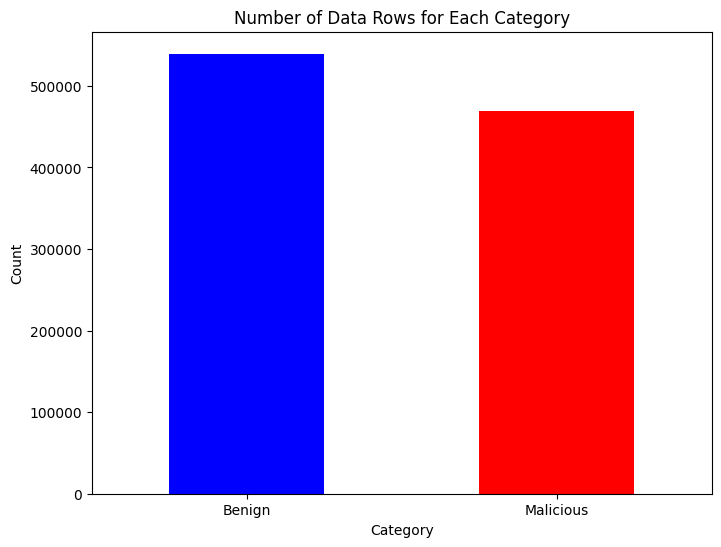

In [10]:
import matplotlib.pyplot as plt

# Count the number of data rows for each category
label_counts = df_subset['label'].value_counts()

# Plot the counts using a bar plot
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Number of Data Rows for Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0, ticks=[0, 1], labels=['Benign', 'Malicious'])
plt.show()


22) Downsample the data to make them equal number of data for each category

In [115]:
# Separate the data into two DataFrames based on the label_encoded column
df_benign = df_subset[df_subset['label'] == 0]
df_malicious = df_subset[df_subset['label'] == 1]

# Downsample the larger DataFrame to match the number of samples in the smaller DataFrame
if len(df_benign) > len(df_malicious):
    df_benign_downsampled = df_benign.sample(n=len(df_malicious), random_state=42)
    df_malicious_downsampled = df_malicious
else:
    df_malicious_downsampled = df_malicious.sample(n=len(df_benign), random_state=42)
    df_benign_downsampled = df_benign

# Concatenate the downsampled DataFrames back together
df_downsampled = pd.concat([df_benign_downsampled, df_malicious_downsampled])

# Shuffle the concatenated DataFrame
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the shape of the downsampled DataFrame
print("Shape of the downsampled DataFrame:", df_downsampled.shape)


Shape of the downsampled DataFrame: (938550, 12)


23) Save the preprocessed data to two dataframes: features (11 columns) and target (1
column from ‘label’)

In [11]:
# Extract features (11 columns)
features = df_subset.drop(columns=['label'])

# Extract target (1 column from 'label_encoded')
target = df_subset['label']

# Display the shapes of features and target dataframes
print("Shape of features dataframe:", features.shape)
print("Shape of target dataframe:", target.shape)

# Optionally, you can save these dataframes to separate files
features.to_csv('features.csv', index=False)
target.to_csv('target.csv', index=False)


Shape of features dataframe: (1008748, 11)
Shape of target dataframe: (1008748,)


In [12]:
# Features dataframe containing 11 columns
features = df_subset.drop(columns=['label'])

# Target dataframe containing only the 'label' column
target = df_subset[['label']]


In [13]:

print(target['label'].unique())

[1 0]


### Part 3. Decision Tree for Malware Detection

1) Use train_test_split to make 70% rows for training and 30% rows for test

In [34]:
from sklearn.model_selection import train_test_split

# Splitting the data into features and target variable
X = features
y = target

# Splitting the data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Reshape the target variables into a 1D array
y_train_reshaped = y_train.values.ravel()
y_test_reshaped = y_test.values.ravel()

# Fit and transform the target variable in both the training and test sets
y_train_encoded = label_encoder.fit_transform(y_train_reshaped)
y_test_encoded = label_encoder.transform(y_test_reshaped)


In [36]:
# Check unique categories in the training set
print(X_train['proto'].unique())
print(X_train['service'].unique())
print(X_train['conn_state'].unique())
print(X_train['history'].unique())

# Check unique categories in the test set
print(X_test['proto'].unique())
print(X_test['service'].unique())
print(X_test['conn_state'].unique())
print(X_test['history'].unique())


['udp' 'tcp' 'icmp']
['-' 'http' 'dhcp']
['S0' 'OTH' 'RSTR' 'SF' 'REJ' 'RSTOS0' 'RSTRH' 'S2' 'RSTO' 'S1' 'SH']
['D' 'Others' '-' 'ShAdDarfR' 'ShAdDfFa' 'Dd' 'ShAdDafF' 'ShADar'
 'ShAdDaftF' 'R' 'ShAdDaFf' 'ShAdDatfF' 'ShADadfF' 'ShADr' 'ShAdDaFr'
 'ShADfFa' 'ShAdDafFr' 'ShADafdtF' 'ShAdtDaFrR' 'ShAfFa' 'ShAdDr'
 'ShADafF' 'Ar' 'ShAdDafrR' 'HaDdAFf' 'ShADdfFa' 'ShAdDtafF' 'ShADafr'
 'ShADfaF' 'ShAdDfFr' 'ShAFa' 'ShAr' 'ShAdDaTFf' 'ShAdDaFfR' 'HaDdAfF'
 'ShADfFr' 'ShAdDaFTf' 'ShAdDatFr' 'ShAF' 'ShADadR' 'ShAdDafFR' 'ShADadfR'
 '^r' 'ShADfrFr' 'ShAdDtafFr' 'D^' '^aR' 'SaR' 'ShA' 'ShAdaFr'
 'ShAdDatFrR' 'ShADFr' 'ShAdFaf' 'ShADarfF' 'ShADfdtFaR' 'F' 'ShADF' 'Fa'
 'ShAdDatrfR' 'ShAdDaTfF' 'ShADadRf' 'HaADdFf' 'ShAdtDafF' 'ShAfdtDFr'
 'ShAdtDaFr' 'ShAdDaF' '^hADafF' 'ShAFr' 'ShAdDaTFfR' 'ShAFf' 'ShAdDar'
 'ShADfR' 'ShADfrF' 'ShAdDafFrR' 'ShAdDaFfr' 'ShAdDaFrR' 'HaR' 'Ffa'
 'ShAdDafrFr' 'HaFfA' 'ShADFadfRR' 'ShAdfDFr' 'ShAdDaFRf' 'ShAdfFa'
 'ShAdDafr' 'ShADfdtR' 'ShAdDFar' 'ShAFdRfR' 'ShAdDta

In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column in X_train
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column] = label_encoder.fit_transform(X_train[column])

# Similarly, you should also apply label encoding to categorical columns in X_test if there are any.


In [40]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on each categorical column in X_train
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        label_encoder.fit(X_train[column])
        X_train[column] = label_encoder.transform(X_train[column])

# Apply the fitted LabelEncoder to each categorical column in X_test
for column in X_test.columns:
    if X_test[column].dtype == 'object':
        label_encoder.fit(X_test[column])
        X_test[column] = label_encoder.transform(X_test[column])



2.Use tree.DecisionTreeClassifier to design a decision tree classifier based on training data
and entropy. Plot the design tree in figure using tree.plot_tree. How many nodes does this
tree have?

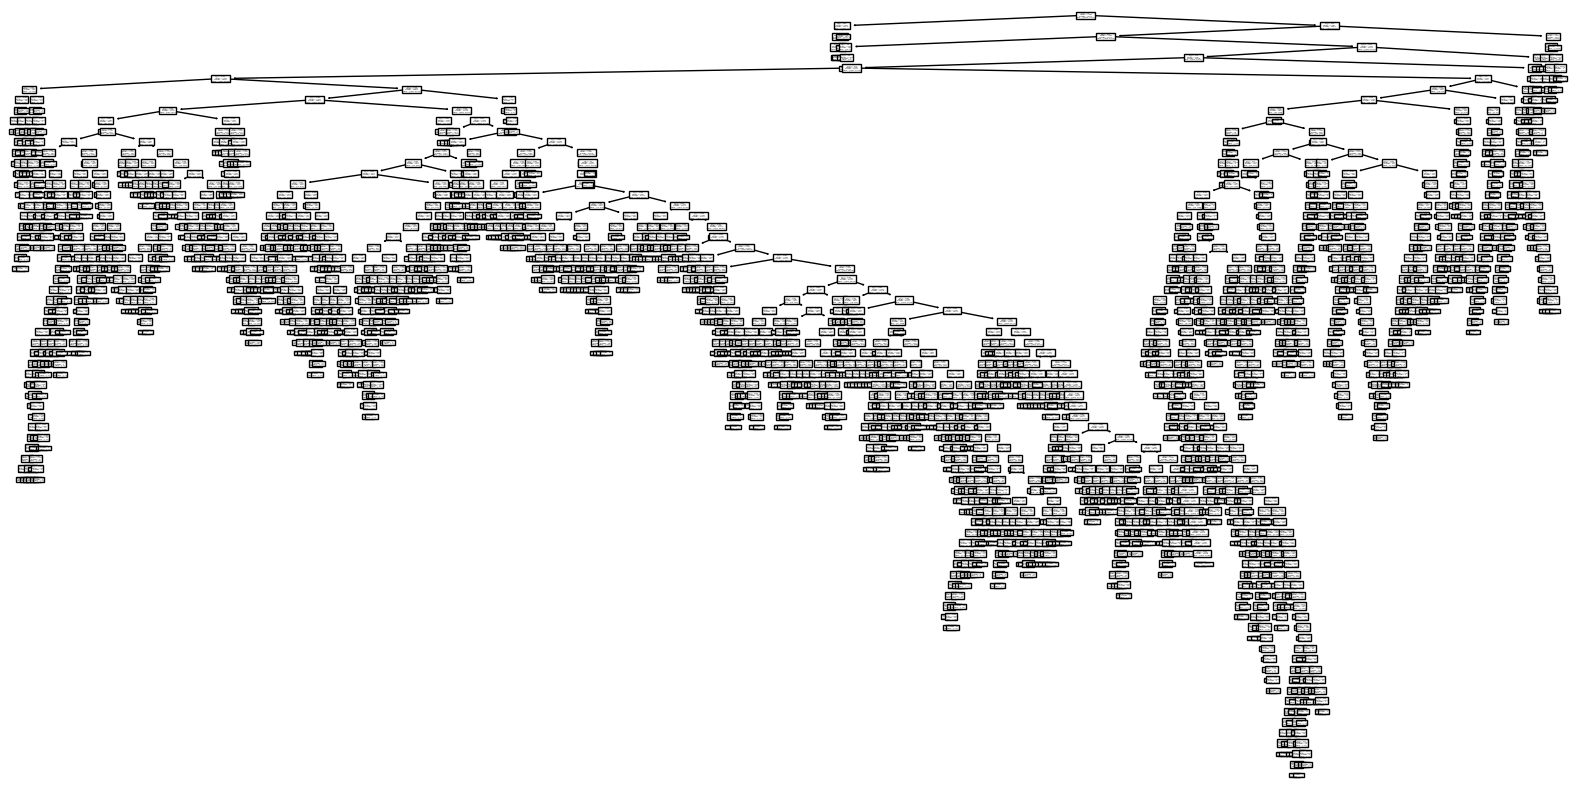

Number of nodes in the decision tree: 3213


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Instantiate the imputer with a strategy to fill missing values (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the data
X_train_imputed = imputer.fit_transform(X_train)

# Initialize the DecisionTreeClassifier with entropy criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy')

# Fit the classifier on the imputed training data
clf_entropy.fit(X_train_imputed, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf_entropy)
plt.show()

# Number of nodes in the decision tree
num_nodes = clf_entropy.tree_.node_count
print("Number of nodes in the decision tree:", num_nodes)


3) Use test data to get the performance using confusion matrix and accuracy_score. Plot the
ROC curve (receiver operating characteristic curve) using roc_curve

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix:
[[140708    114]
 [158118   3685]]
Accuracy Score: 0.47713506815365553


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


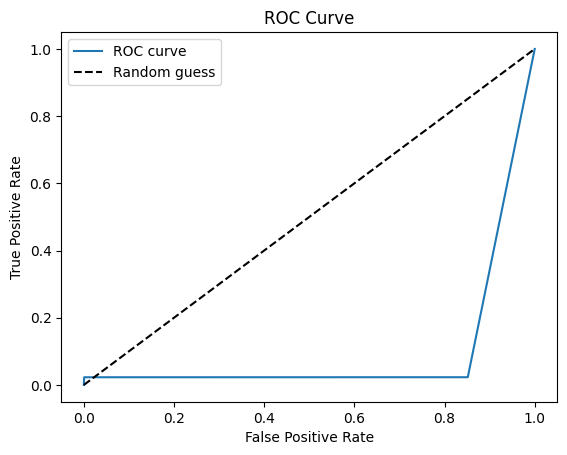

In [178]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer to impute missing values with the mean
numerical_imputer_test = SimpleImputer(strategy='mean')

# Impute missing values in numerical columns for the test set
X_test_numerical_imputed = numerical_imputer_test.fit_transform(X_test[numerical_columns])

# Apply one-hot encoding to categorical columns in the test set
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Concatenate one-hot encoded categorical variables with imputed numerical variables
X_test_final = np.concatenate([X_test_encoded, X_test_numerical_imputed], axis=1)

# Predicting the labels for the test set
y_pred = clf_entropy.predict(X_test_final)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Plotting the ROC curve
y_pred_proba = clf_entropy.predict_proba(X_test_final)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


4) List the IF-THEN rules using export_text

In [179]:
from sklearn.tree import export_text

# Export the decision rules
tree_rules = export_text(clf_entropy, feature_names=list(X_train.columns))

# Print the decision rules
print(tree_rules)


|--- history <= 17.50
|   |--- conn_state <= 9.50
|   |   |--- orig_bytes <= 2.00
|   |   |   |--- resp_ip_bytes <= 92.00
|   |   |   |   |--- class: 0
|   |   |   |--- resp_ip_bytes >  92.00
|   |   |   |   |--- resp_ip_bytes <= 112.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- resp_ip_bytes >  112.00
|   |   |   |   |   |--- class: 0
|   |   |--- orig_bytes >  2.00
|   |   |   |--- orig_ip_bytes <= 46.00
|   |   |   |   |--- history <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- history >  2.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- orig_ip_bytes >  46.00
|   |   |   |   |--- class: 0
|   |--- conn_state >  9.50
|   |   |--- orig_ip_bytes <= 46.00
|   |   |   |--- duration <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- duration >  1.65
|   |   |   |   |--- class: 0
|   |   |--- orig_ip_bytes >  46.00
|   |   |   |--- duration <= 0.15
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  0.15
|   |   |   |   |--- class: 1
|--- histo

5) Compute the mutual information between each feature and the target in training data
using sklearn function mutual_info_classif. Select top two features based on mutual
information.

In [181]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif

# Initialize SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Compute mutual information between each feature and the target
mutual_info = mutual_info_classif(X_train_imputed, y_train)

# Create a dictionary to store feature names and their mutual information scores
feature_mutual_info = dict(zip(X_train.columns, mutual_info))

# Sort the features based on their mutual information scores
sorted_features = sorted(feature_mutual_info.items(), key=lambda x: x[1], reverse=True)

# Select the top two features
top_features = [feature[0] for feature in sorted_features[:2]]

print("Top two features based on mutual information:")
for feature in top_features:
    print(feature)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Top two features based on mutual information:
history
proto


6) Design a decision tree classifier based on the two selected features using entropy. Plot the
design tree in figure using tree.plot_tree. How many nodes does this tree have

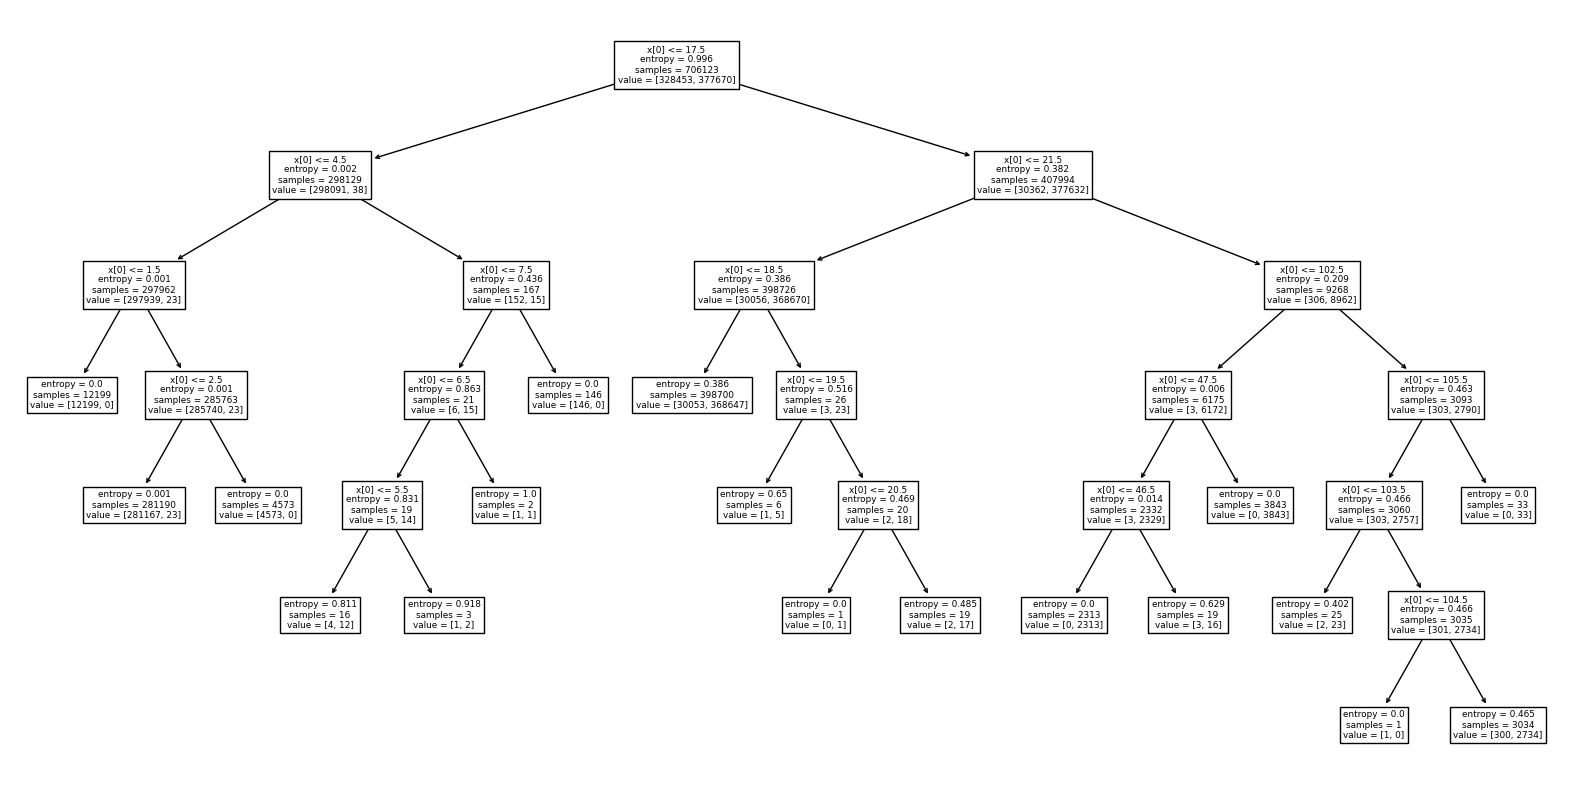

Number of nodes in the decision tree with selected features: 35


In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Select only the two features for training data
X_train_selected = X_train[['history', 'proto']]

# Initialize the DecisionTreeClassifier with entropy criterion
clf_entropy_selected = DecisionTreeClassifier(criterion='entropy')

# Fit the classifier on the training data with selected features
clf_entropy_selected.fit(X_train_selected, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf_entropy_selected)
plt.show()

# Number of nodes in the decision tree with selected features
num_nodes_selected = clf_entropy_selected.tree_.node_count
print("Number of nodes in the decision tree with selected features:", num_nodes_selected)


7) Use test data to get the performance using confusion matrix and accuracy_score. Plot the
ROC curve (receiver operating characteristic curve) using roc_curve

Confusion Matrix for Test Data:
[[140691    131]
 [157974   3829]]
Accuracy Score for Test Data: 0.47755472945064026


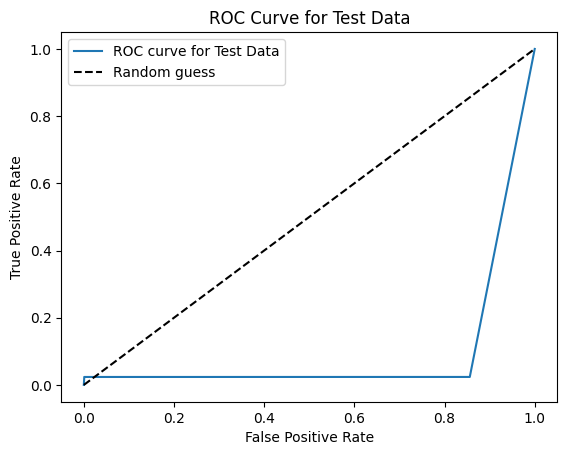

In [183]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# Select only the two features for the test data
X_test_selected = X_test[['history', 'proto']]

# Predicting the labels for the test set using the trained classifier
y_pred_test = clf_entropy_selected.predict(X_test_selected)

# Calculating the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for Test Data:")
print(cm_test)

# Calculating the accuracy score
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy Score for Test Data:", accuracy_test)

# Plotting the ROC curve
y_pred_proba_test = clf_entropy_selected.predict_proba(X_test_selected)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba_test)
plt.plot(fpr_test, tpr_test, label='ROC curve for Test Data')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend()
plt.show()


8) List the IF-THEN rules using export_text

In [184]:
from sklearn.tree import export_text

# Export the decision tree rules as text
tree_rules_text = export_text(clf_entropy_selected, feature_names=['history', 'proto'])

# Print the IF-THEN rules
print("IF-THEN Rules:")
print(tree_rules_text)


IF-THEN Rules:
|--- history <= 17.50
|   |--- history <= 4.50
|   |   |--- history <= 1.50
|   |   |   |--- class: 0
|   |   |--- history >  1.50
|   |   |   |--- history <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- history >  2.50
|   |   |   |   |--- class: 0
|   |--- history >  4.50
|   |   |--- history <= 7.50
|   |   |   |--- history <= 6.50
|   |   |   |   |--- history <= 5.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- history >  5.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- history >  6.50
|   |   |   |   |--- class: 0
|   |   |--- history >  7.50
|   |   |   |--- class: 0
|--- history >  17.50
|   |--- history <= 21.50
|   |   |--- history <= 18.50
|   |   |   |--- class: 1
|   |   |--- history >  18.50
|   |   |   |--- history <= 19.50
|   |   |   |   |--- class: 1
|   |   |   |--- history >  19.50
|   |   |   |   |--- history <= 20.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- history >  20.50
|   |   |   |   |   |--- class: 1
|   |

# PART 3- 9 (1-8)

Step 1,2,3 using gini

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


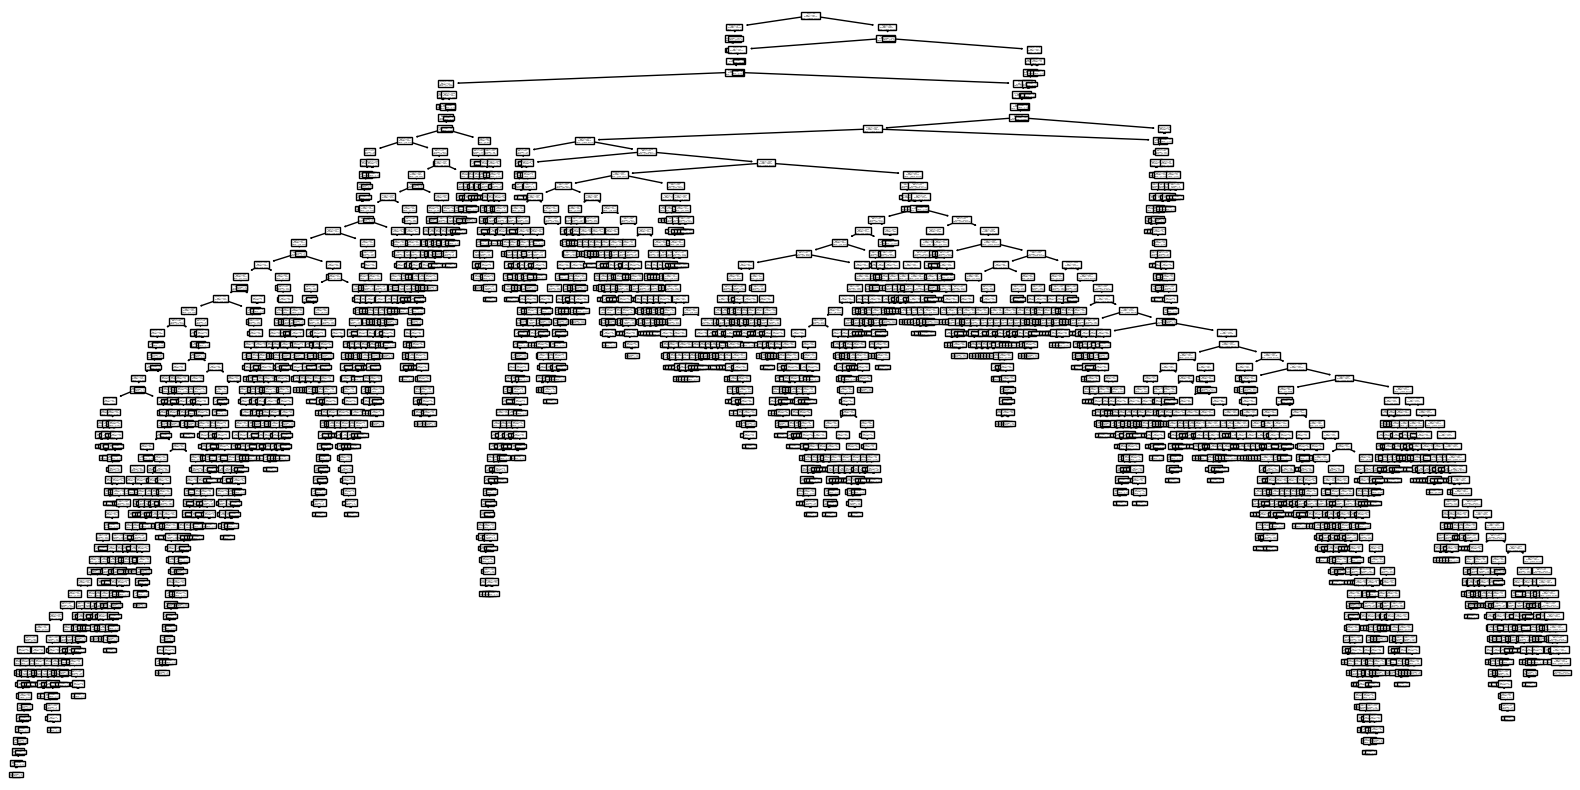

Confusion Matrix:
[[127755  13067]
 [   210 161593]]
Accuracy Score: 0.95612722015696


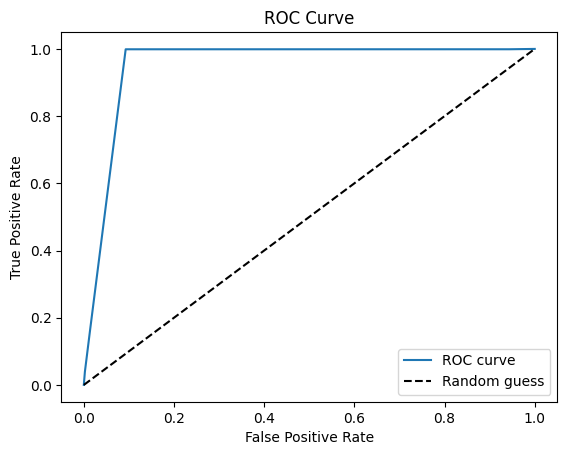

In [192]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
import matplotlib.pyplot as plt
from sklearn import tree

# Load the data
# Assuming df_subset is already defined
# df_subset = pd.read_csv("your_data.csv")

# Identify numerical and categorical columns
numerical_columns = df_subset.select_dtypes(include=['float64']).columns
categorical_columns = df_subset.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
df_subset[numerical_columns] = numerical_imputer.fit_transform(df_subset[numerical_columns])

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df_subset[categorical_columns])

# Concatenate one-hot encoded categorical variables with numerical variables
X = np.concatenate([encoded_features, df_subset[numerical_columns]], axis=1)
y = df_subset['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train decision tree classifier with 'gini' criterion
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_gini)
plt.show()

# Predicting the labels for the test set
y_pred = clf_gini.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Plotting the ROC curve
y_pred_proba = clf_gini.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Step 4

In [196]:
from sklearn.tree import export_text

# Get feature names for one-hot encoded categorical variables
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Combine feature names for categorical and numerical variables
feature_names = list(encoded_feature_names) + list(numerical_columns)

# Export the decision tree rules as text
tree_rules_gini = export_text(clf_gini, feature_names=feature_names)
print(tree_rules_gini)


|--- proto_tcp <= 0.50
|   |--- orig_ip_bytes <= 48.00
|   |   |--- history_D <= 0.50
|   |   |   |--- class: 0
|   |   |--- history_D >  0.50
|   |   |   |--- class: 0
|   |--- orig_ip_bytes >  48.00
|   |   |--- class: 0
|--- proto_tcp >  0.50
|   |--- history_R <= 0.50
|   |   |--- resp_ip_bytes <= 163.50
|   |   |   |--- history_Ar <= 0.50
|   |   |   |   |--- resp_ip_bytes <= 154.00
|   |   |   |   |   |--- duration <= 1.96
|   |   |   |   |   |   |--- duration <= 0.00
|   |   |   |   |   |   |   |--- resp_ip_bytes <= 58.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- resp_ip_bytes >  58.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- duration >  0.00
|   |   |   |   |   |   |   |--- duration <= 1.96
|   |   |   |   |   |   |   |   |--- history_ShrA <= 0.50
|   |   |   |   |   |   |   |   |   |--- resp_pkts <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- duration <= 1.28
|   |   |   |   |   |   |   |   |   |   | 

Step 5

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a DecisionTreeClassifier with Gini impurity
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Fit the classifier on the training data
clf_gini.fit(X_train_imputed, y_train)

# Compute Gini importance for each feature
gini_importance = clf_gini.feature_importances_

# Create a dictionary to store feature names and their Gini importance scores
feature_gini_importance = dict(zip(df_subset.columns, gini_importance))

# Sort the features based on their Gini importance scores
sorted_features_gini = sorted(feature_gini_importance.items(), key=lambda x: x[1], reverse=True)

# Select the top two features
top_features_gini = [feature[0] for feature in sorted_features_gini[:2]]

print("Top two features based on Gini importance:")
for feature in top_features_gini:
    print(feature)


Top two features based on Gini importance:
service
label


Step 6

In [26]:
# Fit the imputer on the training data and transform both training and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


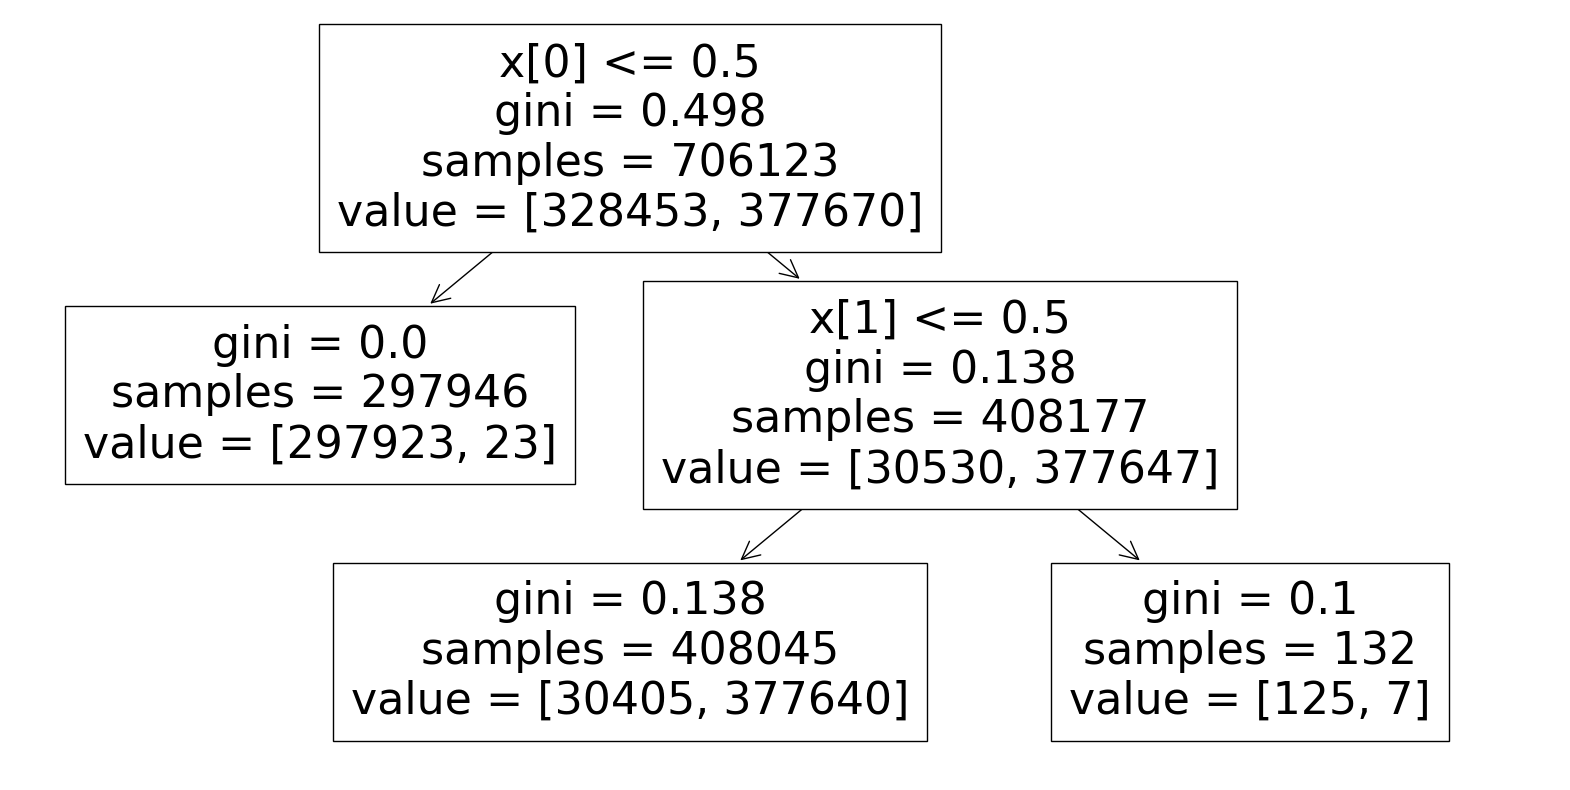

Number of nodes in the decision tree (Gini with top two features): 5


In [31]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Extract the top two features from the training and test sets
X_train_top_gini = X_train_imputed[:, [df_subset.columns.get_loc(feature) for feature in top_features_gini]]
X_test_top_gini = X_test_imputed[:, [df_subset.columns.get_loc(feature) for feature in top_features_gini]]

# Initialize a DecisionTreeClassifier with Gini criterion
clf_gini_top = DecisionTreeClassifier(criterion='gini', random_state=42)

# Fit the classifier on the training data
clf_gini_top.fit(X_train_top_gini, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_gini_top)
plt.show()

# Count the number of nodes in the tree
num_nodes_gini_top = clf_gini_top.tree_.node_count
print("Number of nodes in the decision tree (Gini with top two features):", num_nodes_gini_top)


Step 7

Confusion Matrix (Top Two Features - Gini):
[[127720  13102]
 [    13 161790]]
Accuracy Score (Top Two Features - Gini): 0.9566625361420901


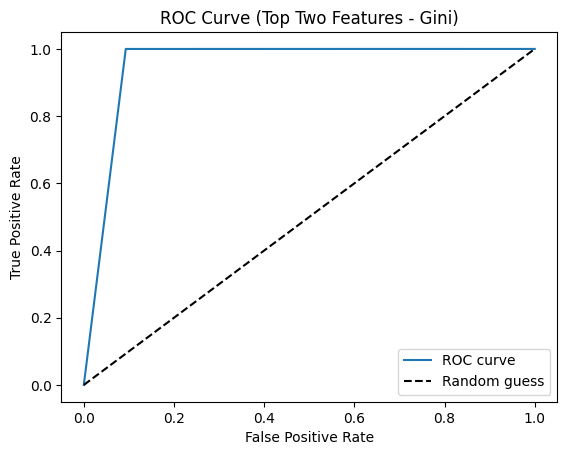

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Predicting the labels for the test set using the decision tree classifier
y_pred_gini_top = clf_gini_top.predict(X_test_top_gini)

# Calculating the confusion matrix
cm_gini_top = confusion_matrix(y_test, y_pred_gini_top)
print("Confusion Matrix (Top Two Features - Gini):")
print(cm_gini_top)

# Calculating the accuracy score
accuracy_gini_top = accuracy_score(y_test, y_pred_gini_top)
print("Accuracy Score (Top Two Features - Gini):", accuracy_gini_top)

# Plotting the ROC curve
y_pred_proba_gini_top = clf_gini_top.predict_proba(X_test_top_gini)[:, 1]
fpr_gini_top, tpr_gini_top, thresholds_gini_top = roc_curve(y_test, y_pred_proba_gini_top)
plt.plot(fpr_gini_top, tpr_gini_top, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Top Two Features - Gini)')
plt.legend()
plt.show()


Step 8

In [33]:
from sklearn.tree import export_text

# Export the decision tree rules as text
tree_rules_gini_top = export_text(clf_gini_top, feature_names=top_features_gini)
print("Decision Tree Rules (Top Two Features - Gini):")
print(tree_rules_gini_top)


Decision Tree Rules (Top Two Features - Gini):
|--- service <= 0.50
|   |--- class: 0
|--- service >  0.50
|   |--- label <= 0.50
|   |   |--- class: 1
|   |--- label >  0.50
|   |   |--- class: 0

